## Decision tree and ensemble learning week 06
#### In this homework, we will use the Students Performance in 2024 JAMB dataset from Kaggle.

- The goal of this homework is to create a regression model for predicting the performance of students on a standardized test (column 'JAMB_Score').

## Preparing the dataset
- First, let's make the names lowercase:

- - df.columns = df.columns.str.lower().str.replace(' ', '_')
Preparation:

- Remove the student_id column.
- Fill missing values with zeros.
- Do train/validation/test split with 60%/20%/20% distribution.
- Use the train_test_split function and set the random_state parameter to 1.
- Use DictVectorizer(sparse=True) to turn the dataframes into matrices.

In [1]:
!wget https://github.com/alexeygrigorev/datasets/raw/refs/heads/master/jamb_exam_results.csv

'wget' is not recognized as an internal or external command,
operable program or batch file.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("jamb_exam_results.csv")
df.head()

,JAMB_Score,Study_Hours_Per_Week,Attendance_Rate,Teacher_Quality,Distance_To_School,School_Type,School_Location,Extra_Tutorials,Access_To_Learning_Materials,Parent_Involvement,IT_Knowledge,Student_ID,Age,Gender,Socioeconomic_Status,Parent_Education_Level,Assignments_Completed
0,192,22,78,4,12.4,Public,Urban,Yes,Yes,High,Medium,1,17,Male,Low,Tertiary,2
1,207,14,88,4,2.7,Public,Rural,No,Yes,High,High,2,15,Male,High,NaN,1
2,182,29,87,2,9.6,Public,Rural,Yes,Yes,High,Medium,3,20,Female,High,Tertiary,2
3,210,29,99,2,2.6,Public,Urban,No,Yes,Medium,High,4,22,Female,Medium,Tertiary,1
4,199,12,98,3,8.8,Public,Urban,No,Yes,Medium,Medium,5,22,Female,Medium,Tertiary,1


In [4]:
df.describe()

,JAMB_Score,Study_Hours_Per_Week,Attendance_Rate,Teacher_Quality,Distance_To_School,Student_ID,Age,Assignments_Completed
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,174.074600,19.521200,84.235200,2.521400,10.005460,2500.500000,18.445800,1.804600
std,47.616477,9.634569,9.485688,0.985564,4.820221,1443.520003,2.301504,0.992076
min,100.000000,0.000000,50.000000,1.000000,0.000000,1.000000,15.000000,1.000000
25%,135.000000,13.000000,78.000000,2.000000,6.600000,1250.750000,16.000000,1.000000
50%,170.000000,19.000000,84.000000,2.000000,10.000000,2500.500000,18.000000,1.000000
75%,209.000000,26.000000,91.000000,3.000000,13.400000,3750.250000,20.000000,2.000000
max,367.000000,40.000000,100.000000,5.000000,20.000000,5000.000000,22.000000,5.000000


In [5]:
len(df)

5000

In [6]:
# str operation
df.columns = df.columns.str.lower()
df.head()

,jamb_score,study_hours_per_week,attendance_rate,teacher_quality,distance_to_school,school_type,school_location,extra_tutorials,access_to_learning_materials,parent_involvement,it_knowledge,student_id,age,gender,socioeconomic_status,parent_education_level,assignments_completed
0,192,22,78,4,12.4,Public,Urban,Yes,Yes,High,Medium,1,17,Male,Low,Tertiary,2
1,207,14,88,4,2.7,Public,Rural,No,Yes,High,High,2,15,Male,High,NaN,1
2,182,29,87,2,9.6,Public,Rural,Yes,Yes,High,Medium,3,20,Female,High,Tertiary,2
3,210,29,99,2,2.6,Public,Urban,No,Yes,Medium,High,4,22,Female,Medium,Tertiary,1
4,199,12,98,3,8.8,Public,Urban,No,Yes,Medium,Medium,5,22,Female,Medium,Tertiary,1


In [7]:
# remove student Id
df = df.drop("student_id", axis=1)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 16 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   jamb_score                    5000 non-null   int64  
 1   study_hours_per_week          5000 non-null   int64  
 2   attendance_rate               5000 non-null   int64  
 3   teacher_quality               5000 non-null   int64  
 4   distance_to_school            5000 non-null   float64
 5   school_type                   5000 non-null   object 
 6   school_location               5000 non-null   object 
 7   extra_tutorials               5000 non-null   object 
 8   access_to_learning_materials  5000 non-null   object 
 9   parent_involvement            5000 non-null   object 
 10  it_knowledge                  5000 non-null   object 
 11  age                           5000 non-null   int64  
 12  gender                        5000 non-null   object 
 13  soc

In [9]:
# missing value
df.isnull().sum()

jamb_score                        0
study_hours_per_week              0
attendance_rate                   0
teacher_quality                   0
distance_to_school                0
school_type                       0
school_location                   0
extra_tutorials                   0
access_to_learning_materials      0
parent_involvement                0
it_knowledge                      0
age                               0
gender                            0
socioeconomic_status              0
parent_education_level          891
assignments_completed             0
dtype: int64

In [10]:
df = df.fillna(0)

In [11]:
df.isnull().sum()

jamb_score                      0
study_hours_per_week            0
attendance_rate                 0
teacher_quality                 0
distance_to_school              0
school_type                     0
school_location                 0
extra_tutorials                 0
access_to_learning_materials    0
parent_involvement              0
it_knowledge                    0
age                             0
gender                          0
socioeconomic_status            0
parent_education_level          0
assignments_completed           0
dtype: int64

In [12]:
# data split

from sklearn.model_selection import train_test_split 

df_train_full, df_test = train_test_split(df,test_size=0.2 ,random_state=1)
df_train, df_val = train_test_split(df_train_full, test_size=0.25, random_state=1)
len(df_train), len(df_test), len(df_val)

(3000, 1000, 1000)

In [13]:
y_train = df_train["jamb_score"]
y_val = df_val["jamb_score"]
y_test = df_test["jamb_score"]

# del the col from the dataset
del df_train["jamb_score"]
del df_val["jamb_score"]
del df_test['jamb_score']

In [14]:
from sklearn.feature_extraction import DictVectorizer
dv = DictVectorizer(sparse=False)

# train_dic = 
# val_dic = df_val.to_dict(orient = 'records')
# fit and transform for train split 
X_train = dv.fit_transform(df_train.to_dict(orient="records"))
# transform only for val split
X_val = dv.transform(df_val.to_dict(orient = 'records'))

len(X_train), len(X_val)


(3000, 1000)

In [15]:
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor(max_depth=1)
dt.fit(X_train,y_train)
dt

DecisionTreeRegressor(max_depth=1)

In [16]:
dv.feature_names_

['access_to_learning_materials=No',
 'access_to_learning_materials=Yes',
 'age',
 'assignments_completed',
 'attendance_rate',
 'distance_to_school',
 'extra_tutorials=No',
 'extra_tutorials=Yes',
 'gender=Female',
 'gender=Male',
 'it_knowledge=High',
 'it_knowledge=Low',
 'it_knowledge=Medium',
 'parent_education_level',
 'parent_education_level=Primary',
 'parent_education_level=Secondary',
 'parent_education_level=Tertiary',
 'parent_involvement=High',
 'parent_involvement=Low',
 'parent_involvement=Medium',
 'school_location=Rural',
 'school_location=Urban',
 'school_type=Private',
 'school_type=Public',
 'socioeconomic_status=High',
 'socioeconomic_status=Low',
 'socioeconomic_status=Medium',
 'study_hours_per_week',
 'teacher_quality']

In [17]:
from sklearn.tree import export_text
print(export_text(dt, feature_names=dv.feature_names_))

|--- study_hours_per_week <= 18.50
|   |--- value: [155.24]
|--- study_hours_per_week >  18.50
|   |--- value: [188.59]



### Question 2
#### Train a random forest regressor with these parameters:

- n_estimators=10
- random_state=1
- n_jobs=-1 (optional - to make training faster)

In [18]:
# train a random forest regressor model
from sklearn.ensemble import RandomForestRegressor 
rf = RandomForestRegressor(n_estimators=10, random_state=1, n_jobs=-1)
rf.fit(X_train, y_train)

RandomForestRegressor(n_estimators=10, n_jobs=-1, random_state=1)

In [19]:
from sklearn.metrics import  root_mean_squared_error
y_pred = rf.predict(X_val)
root_mean_squared_error(y_val, y_pred)

np.float64(42.13724207871227)

In [24]:
pip install tqdm 


[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip



     ---------------------------------------- 0.0/57.6 kB ? eta -:--:--
     ------- -------------------------------- 10.2/57.6 kB ? eta -:--:--
     ------------- ------------------------ 20.5/57.6 kB 131.3 kB/s eta 0:00:01
     -------------------- ----------------- 30.7/57.6 kB 145.2 kB/s eta 0:00:01
     --------------------------------- ---- 51.2/57.6 kB 201.8 kB/s eta 0:00:01
     -------------------------------------- 57.6/57.6 kB 202.2 kB/s eta 0:00:00
   ---------------------------------------- 0.0/78.3 kB ? eta -:--:--
   -------------------- ------------------- 41.0/78.3 kB 991.0 kB/s eta 0:00:01
   ------------------------------- -------- 61.4/78.3 kB 825.8 kB/s eta 0:00:01
   ---------------------------------------- 78.3/78.3 kB 544.7 kB/s eta 0:00:00


In [28]:
# np.range(10,200, 10)
from tqdm.auto import tqdm
rmse_value_dic = {}

for n in tqdm(range(10, 201, 10)):
    rfn = RandomForestRegressor(n_estimators=n, random_state=1, n_jobs=-1)
    rfn.fit(X_train, y_train)
    y_pred_n = rfn.predict(X_val)
    rmse_v = root_mean_squared_error(y_val, y_pred_n)
    rmse_value_dic[n] = rmse_v
    
    

100%|██████████| 20/20 [00:28<00:00,  1.40s/it]


In [29]:
df_rmse =pd.DataFrame(list(rmse_value_dic.items()), columns=["n_enstimator", "rmse"])

In [ ]:
df_rmse.sort_values("rmse", ascending = False)

,n_enstimator,rmse
0,10,42.137242
1,20,41.461215
2,30,41.106171
3,40,40.917194
4,50,40.852279
5,60,40.784281
6,70,40.677098
12,130,40.650841
17,180,40.641314
18,190,40.631355


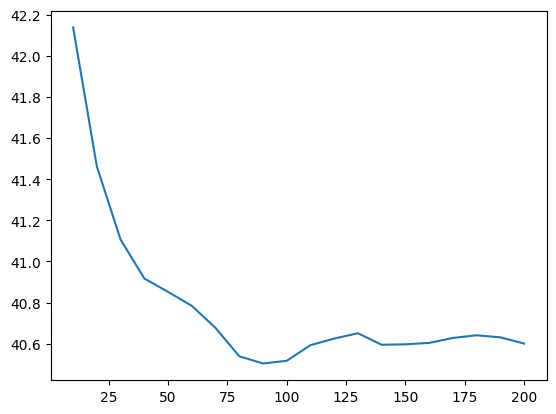

In [39]:
plt.plot(df_rmse["n_enstimator"], round(df_rmse["rmse"],3))
# plt.xlabel("n_enstimator")
# plt.ylabel("rmse")
# plt.title('RMSE vs. Number of Estimators for Random Forest Regressor')
plt.show()

In [59]:
df_rmse['diff'] = df_rmse["rmse"].diff()

df_rmse.sort_values("rmse" ,ascending=False)

,n_enstimator,rmse,diff
0,10,42.137242,NaN
1,20,41.461215,-0.676027
2,30,41.106171,-0.355044
3,40,40.917194,-0.188977
4,50,40.852279,-0.064915
5,60,40.784281,-0.067997
6,70,40.677098,-0.107183
12,130,40.650841,0.025991
17,180,40.641314,0.013768
18,190,40.631355,-0.009959


In [50]:
len(df_rmse)

20

## Question 4
-  -  -   -   -    - -   -  -   -   -    -    -    -      
##### Let's select the best max_depth:

- Try different values of max_depth: [10, 15, 20, 25]
- For each of these values,
    - try different values of n_estimators from 10 till 200 (with step 10)
    - calculate the mean RMSE
- Fix the random seed: random_state=1
What's the best max_depth, using the mean RMSE?

In [60]:
max_d = [10, 15, 20, 25]
max_list = []

for m in tqdm(max_d):
    rfn = RandomForestRegressor(n_estimators=0, random_state=1, n_jobs=-1, max_depth=m)
    for n in tqdm(range(10, 201, 10)):
        rfn.n_estimators = n
        rfn.fit(X_train, y_train)
        y_pred_n = rfn.predict(X_val)
        rmse_v = root_mean_squared_error(y_val, y_pred_n)
        rmse_value_dic[n] = rmse_v
        rfn = RandomForestRegressor(n_estimators=n, random_state=1, n_jobs=-1)
        rfn.fit(X_train, y_train)
        y_pred_n = rfn.predict(X_val)
        rmse_v = root_mean_squared_error(y_val, y_pred_n)
        max_list.append((m, n, rmse_v))
        
columns = ['max_depth', 'n_estimators', 'rmse']
df_scores = pd.DataFrame(max_list, columns=columns)      
df_scores  

100%|██████████| 4/4 [05:03<00:00, 75.99s/it]


,max_depth,n_estimators,rmse
0,10,10,42.137242
1,10,20,41.461215
2,10,30,41.106171
3,10,40,40.917194
4,10,50,40.852279
...,...,...,...
75,25,160,40.603508
76,25,170,40.627546
77,25,180,40.641314
78,25,190,40.631355


In [64]:
df_grp = df_scores.groupby("max_depth")

In [66]:
print(df_grp)

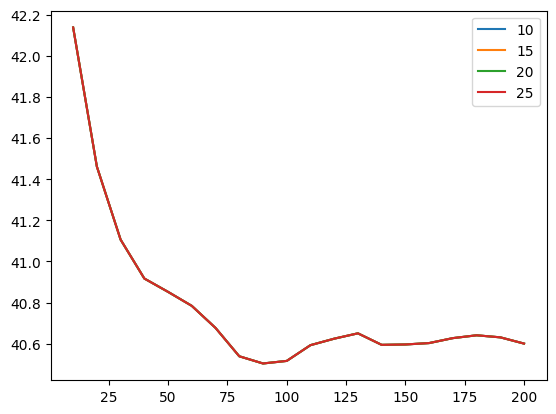

In [61]:
# Plot the RMSE scores.
for d in [10, 15, 20, 25]:
    df_subset = df_scores[df_scores.max_depth == d]
    plt.plot(df_subset.n_estimators, df_subset.rmse, label=d)

plt.legend()
plt.show()